## Install Library

In [2]:
!pip install langgraph langsmith langchain langchain_community langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


## Import Libraries

In [3]:
from google.colab import userdata

groq_api_key = userdata.get('groq')
langsmith_api_key = userdata.get('langsmith')

## set API keys and langsmith trace

In [41]:
import os

os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = "true"#
os.environ['LANGCHAIN_PROJECT'] = "LangGraph_Demo"

## Create Mixtral chatbot using Groq

In [42]:
from langchain_groq import ChatGroq

In [43]:
llm = ChatGroq(groq_api_key=groq_api_key, model='mixtral-8x7b-32768')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7922bb8a6290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7922bba76fd0>, model_kwargs={}, groq_api_key=SecretStr('**********'))

## Build the chatbot using Langgraph

In [44]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [45]:
class State(TypedDict):
  messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

## Define the Chatbot function

In [46]:
def chatbot(state:State):
  return {"messages": llm.invoke(state['messages'])}

## Add chatbot to langgraph

In [47]:
graph_builder.add_node("chatbot", chatbot)
graph_builder

In [48]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [49]:
graph = graph_builder.compile()

## Visulize the Langgraph Agent **Flow**

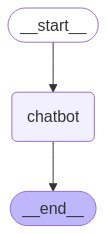

In [51]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

## Ask Query to Agent

In [53]:
while True:
  user_input = input('User: ')
  if user_input.lower() in ["quit", "q", "Q", "Quit"]:
    print("Good Bye")
    print()
    break

  for event in graph.stream({'messages': ("user", user_input)}):
    # print(event.values())
    for value in event.values():
      # print(value['messages'])
      print()
      print('Assistant:', value['messages'].content)
      print()

User: Hi

Assistant: Hello! It's nice toBot meet you. How can I help you today?

User: Where is India in world map ?

Assistant: India is located in southern Asia and is the seventh-largest country in the world by land area. It is bounded by the Arabian Sea to the west, the Bay of Bengal to the east, and the Indian Ocean to the south. India shares its land borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.

On a world map, India is located in the Northern Hemisphere and the Eastern Hemisphere. It is situated between latitudes 8°4'N and 37°6'N, and longitudes 68°7'E and 97°25'E. India is the second-most populous country in the world, with a population of over 1.3 billion people.

India is a federal parliamentary democratic republic and is the world's largest democracy. It is a rapidly developing country with a mixed economy and a high level of economic growth. India is known for its rich history, diverse culture, and numerou